In [1]:
%matplotlib inline

In [2]:
import csv
import numpy as np
import pickle as pk

In [3]:
import os

In [4]:
import time

In [5]:
import pandas as pd

In [6]:
filename = '../data/dataset_tsmc2014/dataset_TSMC2014_TKY.txt'
df = pd.read_csv(filename, encoding='ISO-8859-1', sep='\t', header=None)

In [8]:
len(df[0].unique())

2293

In [10]:
len(df) / (len(df[0].unique()) * 300)

0.8339918592818724

In [12]:
4491143 / (58228 * 900)

0.08570033126483631

In [9]:
df[7] = pd.to_datetime(df[7])

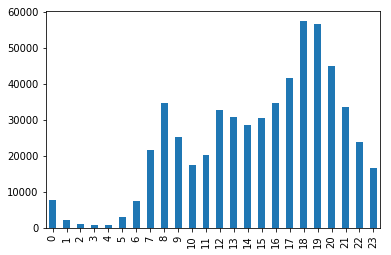

In [10]:
(df[7] + pd.Timedelta('1 min') * df[6]).dt.hour.value_counts().sort_index().plot(kind='bar')

In [11]:
df[7] = (df[7] + pd.Timedelta('1 min') * df[6])

In [12]:
df[6] = pd.to_datetime(df[7]).dt.date

In [13]:
for date, df_oneday in df.groupby(6):
    if len(df_oneday) < 500:
        continue
    filename = '../data/foursquare/' + str(date) + '.pk'
    print(filename)
    
    data = dict({})
    start_time = time.mktime(time.strptime(str(date), '%Y-%m-%d'))
    for _, row in df_oneday.iterrows():
        uid = int(row[0])
        tstamp = time.mktime(time.strptime(str(row[7]).split('+')[0], '%Y-%m-%d %H:%M:%S')) - start_time
        tstamp = min(24 * 3600, tstamp)
        tstamp = max(0, tstamp)
        lat = float(row[4])
        lon = float(row[5])
        if uid not in data:
            data[uid] = [(tstamp, lat, lon)]
        else:
            data[uid].append((tstamp, lat, lon))

    print('Sorting')
    for uid in data:
        data[uid] = sorted(data[uid], key=lambda x: x[0])

    with open(filename, 'wb') as f:
        pk.dump(data, f)

../data/foursquare/2012-04-04.pk
Sorting
../data/foursquare/2012-04-05.pk
Sorting
../data/foursquare/2012-04-08.pk
Sorting
../data/foursquare/2012-04-09.pk
Sorting
../data/foursquare/2012-04-10.pk
Sorting
../data/foursquare/2012-04-11.pk
Sorting
../data/foursquare/2012-04-12.pk
Sorting
../data/foursquare/2012-04-13.pk
Sorting
../data/foursquare/2012-04-14.pk
Sorting
../data/foursquare/2012-04-15.pk
Sorting
../data/foursquare/2012-04-16.pk
Sorting
../data/foursquare/2012-04-17.pk
Sorting
../data/foursquare/2012-04-18.pk
Sorting
../data/foursquare/2012-04-19.pk
Sorting
../data/foursquare/2012-04-20.pk
Sorting
../data/foursquare/2012-04-21.pk
Sorting
../data/foursquare/2012-04-22.pk
Sorting
../data/foursquare/2012-04-23.pk
Sorting
../data/foursquare/2012-04-24.pk
Sorting
../data/foursquare/2012-04-25.pk
Sorting
../data/foursquare/2012-04-26.pk
Sorting
../data/foursquare/2012-04-27.pk
Sorting
../data/foursquare/2012-04-28.pk
Sorting
../data/foursquare/2012-04-29.pk
Sorting
../data/foursqua